# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read in the data
df = pd.read_csv('combined.csv')

In [3]:
# Check the first 5 rows
df.head()

,Unnamed: 0,Unnamed: 0.1,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,...,archived,author_created_utc,can_gild,category,content_categories,hidden,quarantine,removal_reason,subreddit_name_prefixed,brand_safe
0,0,0,[],False,dota2weatherterrain,NaN,[],NaN,text,t2_3rifld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,[],False,CurtainsMcGee,NaN,[],NaN,text,t2_492q32dt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[],False,raisedbyowls,NaN,[],NaN,text,t2_frghf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,[],False,bearfoot_new,NaN,[],NaN,text,t2_6fdebwac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,[],False,Stunning_Singer,NaN,[],NaN,text,t2_5ro874o8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5000 non-null   int64  
 1   Unnamed: 0.1                   5000 non-null   int64  
 2   all_awardings                  2000 non-null   object 
 3   allow_live_comments            2000 non-null   object 
 4   author                         5000 non-null   object 
 5   author_flair_css_class         1008 non-null   object 
 6   author_flair_richtext          2988 non-null   object 
 7   author_flair_text              563 non-null    object 
 8   author_flair_type              2988 non-null   object 
 9   author_fullname                3764 non-null   object 
 10  author_patreon_flair           1992 non-null   object 
 11  author_premium                 995 non-null    object 
 12  awarders                       1767 non-null   o

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,1.249500e+03,7.217600e+02,0.000000e+00,6.247500e+02,1.249500e+03,1.874250e+03,2.499000e+03
Unnamed: 0.1,5000.0,4.950000e+01,2.886896e+01,0.000000e+00,2.475000e+01,4.950000e+01,7.425000e+01,9.900000e+01
created_utc,5000.0,1.538004e+09,4.461446e+07,1.474291e+09,1.506197e+09,1.538175e+09,1.569825e+09,1.601390e+09
num_comments,5000.0,1.424420e+01,4.174921e+01,0.000000e+00,1.000000e+00,5.000000e+00,1.400000e+01,1.175000e+03
num_crossposts,4000.0,4.750000e-03,7.231006e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
pwls,3000.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
retrieved_on,5000.0,1.538416e+09,4.405842e+07,1.476433e+09,1.506290e+09,1.538177e+09,1.569825e+09,1.601391e+09
score,5000.0,9.544320e+01,8.071008e+02,0.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,3.194500e+04
subreddit_subscribers,3000.0,8.601879e+05,3.108768e+05,4.974890e+05,5.936970e+05,7.923460e+05,1.078876e+06,1.412109e+06
total_awards_received,2000.0,5.000000e-04,2.236068e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
# Streamline the amount of columns as most columns to title, selftext and subreddit columns
df = df[['title', 'selftext', 'subreddit']]

In [7]:
# Check the DataFrame
df.head()

,title,selftext,subreddit
0,Score in S10E09,Anybody knows where to find the score of every...,thewalkingdead
1,Amc early access,When does early access for the episode go live...,thewalkingdead
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,thewalkingdead
3,The G A N G ❤,NaN,thewalkingdead
4,For which reason jhon travolta was not the one...,NaN,thewalkingdead


In [8]:
# Check the number of missing columns
df.isna().sum()

title           0
selftext     2036
subreddit       0
dtype: int64

In [9]:
# Check the shape
df.shape

(5000, 3)

In [10]:
# The value counts of both subreddits
df['subreddit'].value_counts()

thewalkingdead    2500
harrypotter       2500
Name: subreddit, dtype: int64

The subreddits column has 2500 of each of the subreddits that we would be using for this classification problem.

In [11]:
# Convert the subreddits column to 0's and 1's
df['subreddit'] = df['subreddit'].map({'thewalkingdead':1, 'harrypotter': 0})
df.head(3)

,title,selftext,subreddit
0,Score in S10E09,Anybody knows where to find the score of every...,1
1,Amc early access,When does early access for the episode go live...,1
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1


In [12]:
# Create a column with all the texts for easy counting of the characters in the text
df['alltexts'] = df['title'] + ' ' + df['selftext']

In [13]:
df.head(3)

,title,selftext,subreddit,alltexts
0,Score in S10E09,Anybody knows where to find the score of every...,1,Score in S10E09 Anybody knows where to find th...
1,Amc early access,When does early access for the episode go live...,1,Amc early access When does early access for th...
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1,Why does TWD MTG cards logo features a shootin...


In [14]:
# Calculate the Average and median number of characters in the alltexts column
print('The Average number of characters in the alltexts column is: ' + str(round(df['alltexts'].str.len().mean(), 2)))
print('The Median number of characters in the alltexts column is: ' + str(round(df['alltexts'].str.len().median(), 2)))

The Average number of characters in the alltexts column is: 573.23
The Median number of characters in the alltexts column is: 273.0


In [15]:
# For 'the walking dead column'
print('The Average characters in the alltexts, thewalkingdead subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['alltexts'].str.len().mean(), 2)))

The Average characters in the alltexts, thewalkingdead subreddit: 469.16


In [17]:
print('The Median characters in the alltexts, thewalkingdead subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['alltexts'].str.len().median(), 2)))

The Median characters in the alltexts, thewalkingdead subreddit: 196.0


In [16]:
# For 'harrypotter subreddit':
print('The Average characters in the alltexts, harrypotter subreddit: ' + str(round(df.loc[df['subreddit'] == 2]['alltexts'].str.len().mean(), 2)))

The Average characters in the alltexts, harrypotter subreddit: nan


In [18]:
print('The Median characters in the alltexts, harrypotter subreddit: ' + str(round(df.loc[df['subreddit'] == 2]['alltexts'].str.len().median(), 2)))

The Median characters in the alltexts, harrypotter subreddit: nan


This means that there are more nan values in the harrypotter column than in the walking dead column.

In [19]:
df.to_csv('subreddit.csv', index=False)

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('subreddit.csv')

In [4]:
# Creating a column called alltexts_word_count which is the number of words in each alltexts column
df['alltexts_word_count'] = df['alltexts'].str.count(' ') + 1

In [5]:
df.head()

,title,selftext,subreddit,alltexts,alltexts_word_count
0,Score in S10E09,Anybody knows where to find the score of every...,1,Score in S10E09 Anybody knows where to find th...,25.0
1,Amc early access,When does early access for the episode go live...,1,Amc early access When does early access for th...,24.0
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1,Why does TWD MTG cards logo features a shootin...,133.0
3,The G A N G ❤,NaN,1,NaN,NaN
4,For which reason jhon travolta was not the one...,NaN,1,NaN,NaN


In [6]:
# Create a new column called alltexts_length
df['alltexts_length'] = df['alltexts'].str.len()

In [7]:
df.head()

,title,selftext,subreddit,alltexts,alltexts_word_count,alltexts_length
0,Score in S10E09,Anybody knows where to find the score of every...,1,Score in S10E09 Anybody knows where to find th...,25.0,153.0
1,Amc early access,When does early access for the episode go live...,1,Amc early access When does early access for th...,24.0,118.0
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1,Why does TWD MTG cards logo features a shootin...,133.0,912.0
3,The G A N G ❤,NaN,1,NaN,NaN,NaN
4,For which reason jhon travolta was not the one...,NaN,1,NaN,NaN,NaN


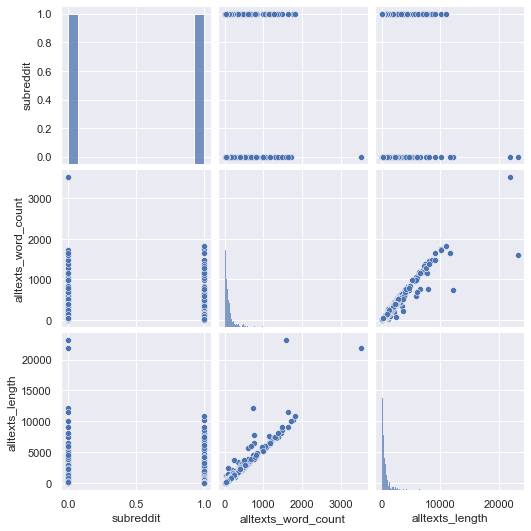

In [8]:
sns.set(rc={'figure.figsize':(15.7,10)})
sns.pairplot(df)
plt.title('Exploration of the subreddits')

In [9]:
df.isna().sum()

title                     0
selftext               2036
subreddit                 0
alltexts               2036
alltexts_word_count    2036
alltexts_length        2036
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                2964 non-null   object 
 1   selftext             2964 non-null   object 
 2   subreddit            2964 non-null   int64  
 3   alltexts             2964 non-null   object 
 4   alltexts_word_count  2964 non-null   float64
 5   alltexts_length      2964 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 162.1+ KB


In [12]:
# df['alltexts'] = df['alltexts'].str.extract('(.*)http')

In [13]:
# Get top words method from kdnuggets
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [14]:
# Top 10 words for 'The Walking Dead'(with no stop words here)
twd_10 = get_top_n_words(df[df['subreddit']==1]['alltexts'], 10)
twd_10 = dict(twd_10)
twd_10

{'season': 948,
 'rick': 882,
 'just': 682,
 'like': 647,
 'dead': 498,
 'spoilers': 496,
 'episode': 468,
 'think': 436,
 'walking': 417,
 'negan': 402}

In [15]:
# Top 10 words for 'Harry Potter' (with no stop words here)
hp_10 = get_top_n_words(df[df['subreddit']==0]['alltexts'], 10)
hp_10 = dict(hp_10)
hp_10

{'harry': 1364,
 'just': 695,
 'like': 636,
 'https': 610,
 'com': 599,
 'potter': 498,
 'think': 457,
 'know': 447,
 'house': 415,
 'books': 368}

From the above, the words 'https' and 'com' appear in harry potter tokens, I will repeat the process above again but try to clean out the 'http' words from it below

In [16]:
# Trying to remove the http from the dataframe
df['alltexts'] = df['alltexts'].str.extract('(.*)http')

In [17]:
df.drop(columns=['alltexts'])

,title,selftext,subreddit,alltexts_word_count,alltexts_length
0,Score in S10E09,Anybody knows where to find the score of every...,1,25.0,153.0
1,Amc early access,When does early access for the episode go live...,1,24.0,118.0
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1,133.0,912.0
6,Is fear the walking dead worth watching?,I got into walking dead around 2012. All it to...,1,83.0,452.0
7,So idk if its just me hearing this but in S6 E...,lol,1,34.0,156.0
...,...,...,...,...,...
4995,Most Animagi would turn into an animal differe...,After reading the Pottermore information on th...,0,148.0,839.0
4996,"Survey results are in: including Patronus, Sor...","*Please note that, at this time, I am still ad...",0,1645.0,11571.0
4997,Is there a compendium of sorts with pictures/v...,See title. I'd love to see if there is already...,0,50.0,256.0
4998,"What are your patronus, houses, and wand?",I think it would be cool to see how diverse we...,0,57.0,314.0


In [18]:
df['alltexts'] = df['title'] + ' ' + df['selftext']

In [19]:
df

,title,selftext,subreddit,alltexts,alltexts_word_count,alltexts_length
0,Score in S10E09,Anybody knows where to find the score of every...,1,Score in S10E09 Anybody knows where to find th...,25.0,153.0
1,Amc early access,When does early access for the episode go live...,1,Amc early access When does early access for th...,24.0,118.0
2,Why does TWD MTG cards logo features a shootin...,If you look at the new MTG TWD cards the logo ...,1,Why does TWD MTG cards logo features a shootin...,133.0,912.0
6,Is fear the walking dead worth watching?,I got into walking dead around 2012. All it to...,1,Is fear the walking dead worth watching? I got...,83.0,452.0
7,So idk if its just me hearing this but in S6 E...,lol,1,So idk if its just me hearing this but in S6 E...,34.0,156.0
...,...,...,...,...,...,...
4995,Most Animagi would turn into an animal differe...,After reading the Pottermore information on th...,0,Most Animagi would turn into an animal differe...,148.0,839.0
4996,"Survey results are in: including Patronus, Sor...","*Please note that, at this time, I am still ad...",0,"Survey results are in: including Patronus, Sor...",1645.0,11571.0
4997,Is there a compendium of sorts with pictures/v...,See title. I'd love to see if there is already...,0,Is there a compendium of sorts with pictures/v...,50.0,256.0
4998,"What are your patronus, houses, and wand?",I think it would be cool to see how diverse we...,0,"What are your patronus, houses, and wand? I th...",57.0,314.0


In [20]:
# Top 10 words for 'The Walking Dead'(with no stop words here)
twd_10 = get_top_n_words(df[df['subreddit']==1]['alltexts'], 10)
twd_10 = dict(twd_10)
twd_10

{'season': 948,
 'rick': 882,
 'just': 682,
 'like': 647,
 'dead': 498,
 'spoilers': 496,
 'episode': 468,
 'think': 436,
 'walking': 417,
 'negan': 402}

In [21]:
# Top 10 words for 'Harry Potter' (with no stop words here)
hp_10 = get_top_n_words(df[df['subreddit']==0]['alltexts'], 10)
hp_10 = dict(hp_10)
hp_10

{'harry': 1364,
 'just': 695,
 'like': 636,
 'https': 610,
 'com': 599,
 'potter': 498,
 'think': 457,
 'know': 447,
 'house': 415,
 'books': 368}

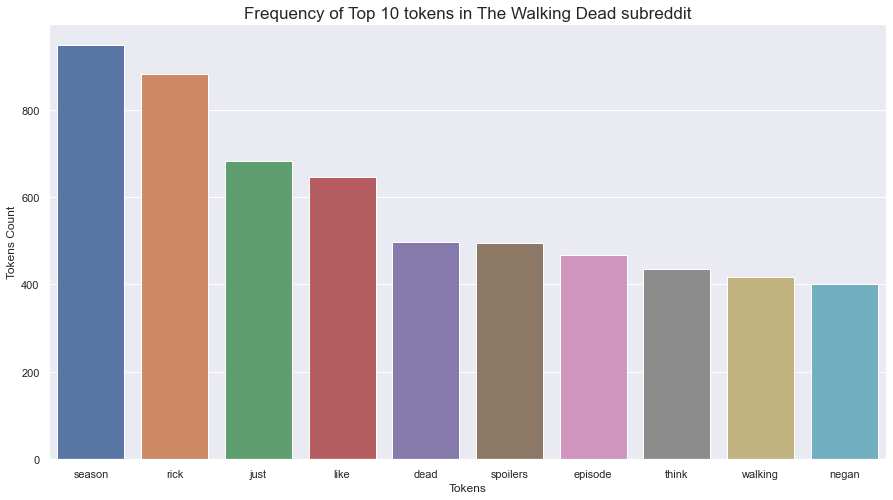

In [22]:
# barplot of the top 10 'The Walking Dead' tokens
plt.figure(figsize=(15, 8))
sns.barplot(x=list(twd_10.keys()), y=list(twd_10.values()))
plt.title('Frequency of Top 10 tokens in The Walking Dead subreddit', fontsize=17)
plt.xlabel('Tokens', fontsize=12)
plt.ylabel('Tokens Count', fontsize=12);
plt.savefig('Frequency of Top 10 tokens in TWD Subreddit')

We can see that the words season and rick appears over 800 times which is expected. This is because its a tv series and one would expects the word season to appear a lot of times as people are discussing which season they are probably watching right now. Also, since rick is the protagonist main lead we would expect that a lot of the discussion in the subreddit forums center around him. Conversely, the word negan also appears in the top 10 words this could probably be also the fact that at that time, negan was the antagonist main lead in the show. I'm sure that if I scrape more data, I might find the word negan will appear more just like rick.

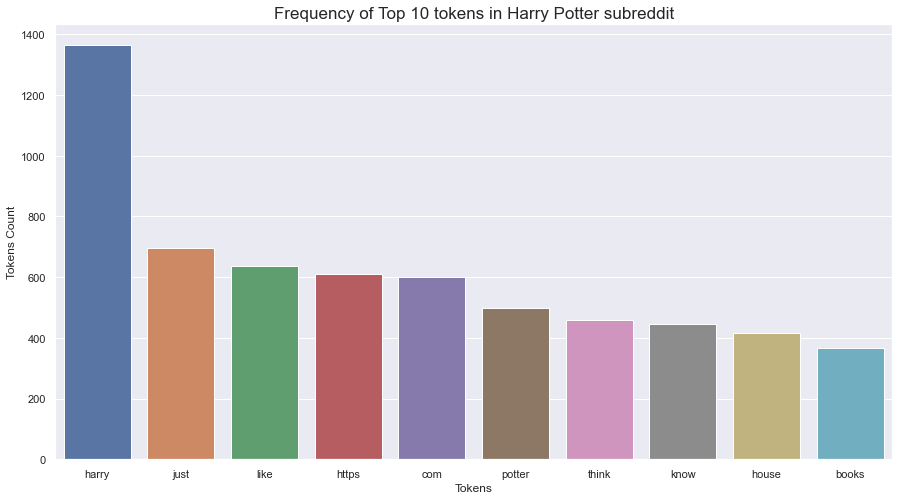

In [23]:
# barplot of the top 10 'The Walking Dead' tokens
plt.figure(figsize=(15, 8))
sns.barplot(x=list(hp_10.keys()), y=list(hp_10.values()))
plt.title('Frequency of Top 10 tokens in Harry Potter subreddit', fontsize=17)
plt.xlabel('Tokens', fontsize=12)
plt.ylabel('Tokens Count', fontsize=12);
plt.savefig('Frequency of Top 10 tokens in HP Subreddit')

Here the word harry is the prominent word in the corpus, this could be because he is the main character and is loved by fans who have read the books or watched the movies. Words like http and com are observed and this is because they are web links that appear frequently in the data set. The words potter, house, books have over 300 observations. The fact that books appears means that this subbreddit is centered around discussions concerning the books. Just like the above, we would expect these to be the strong indications used in the predictions.

In [26]:
# Saving the data to a clean dataframe
df.to_csv('clean_reddit.csv', index=False)